In [2]:
import chardet
import pandas as pd

with open('Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv', encoding=encoding)

In [3]:
import pandas as pd

df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv', encoding='latin-1')
print(df.head())

        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

file_name = 'Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv'
df = pd.read_csv(file_name, encoding='latin-1')

print(df.head())
print(df.columns)
print(df.info())

        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [5]:
# Cleaning and preprocessing steps

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['Summary'], inplace=True)
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
dtype: int64

In [6]:
df['Year'] = df['Date'].dt.year
total_crashes = len(df)
total_fatalities = df['Fatalities'].sum()
total_aboard = df['Aboard'].sum()
survival_rate = (1 - total_fatalities / total_aboard) * 100
crashes_per_year = df['Year'].value_counts().sort_index()

print(f"Total number of crashes: {total_crashes}")
print(f"Total number of fatalities: {total_fatalities}")
print(f"Total number of people aboard: {total_aboard}")
print(f"Survival rate: {survival_rate:.2f}%")

Total number of crashes: 4998
Total number of fatalities: 111644.0
Total number of people aboard: 155356.0
Survival rate: 28.14%


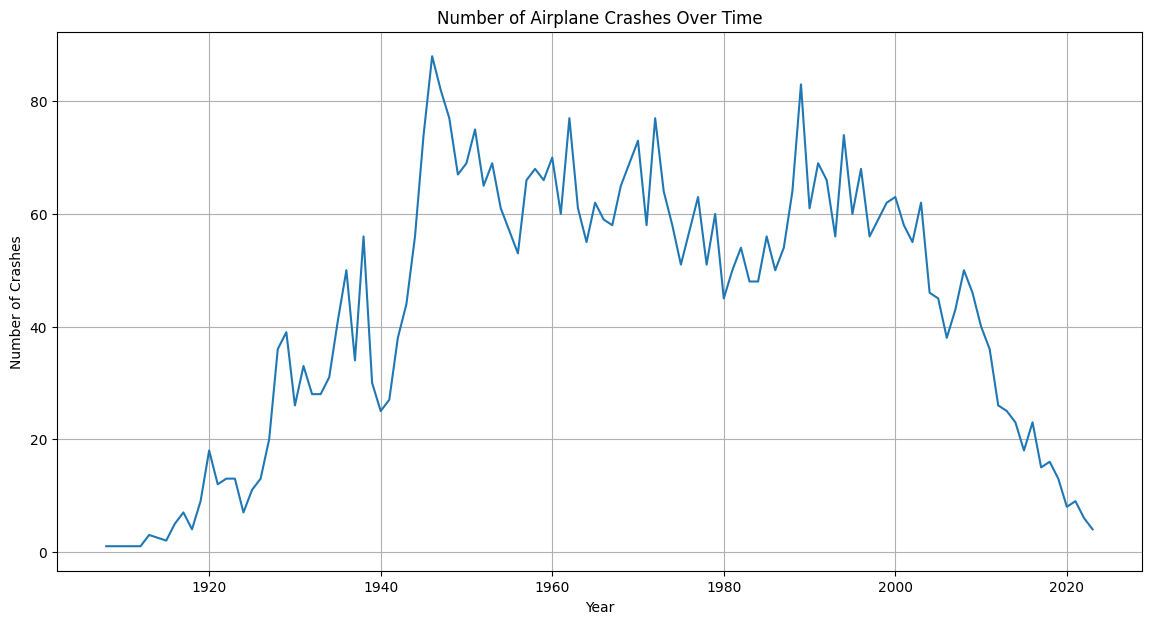

In [7]:
#Line Graph
plt.figure(figsize=(14, 7))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title('Number of Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

In [8]:
#Bar Chart
fig = px.bar(crashes_per_year, x=crashes_per_year.index, y=crashes_per_year.values,
             labels={'x': 'Year', 'y': 'Number of Crashes'},
             title='Number of Airplane Crashes Over Time')
fig.show()

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['Year'] = df['Date'].dt.year

fatalities = df['Fatalities'].dropna()
mean_fatalities = fatalities.mean()
median_fatalities = fatalities.median()
std_fatalities = fatalities.std()

print(f"Mean fatalities: {mean_fatalities}")
print(f"Median fatalities: {median_fatalities}")
print(f"Standard deviation of fatalities: {std_fatalities}")

df['Survival Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard'] * 100
survival_rate = df['Survival Rate'].dropna()

mean_survival_rate = survival_rate.mean()
median_survival_rate = survival_rate.median()
std_survival_rate = survival_rate.std()

print(f"Mean survival rate: {mean_survival_rate}")
print(f"Median survival rate: {median_survival_rate}")
print(f"Standard deviation of survival rate: {std_survival_rate}")

df['Decade'] = (df['Year'] // 10) * 10
mean_fatalities_per_decade = df.groupby('Decade')['Fatalities'].mean()
print(mean_fatalities_per_decade)

decade_1980s = df[df['Decade'] == 1980]['Fatalities'].dropna()
decade_2000s = df[df['Decade'] == 2000]['Fatalities'].dropna()
t_stat, p_value = stats.ttest_ind(decade_1980s, decade_2000s)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the average number of fatalities between the 1980s and 2000s.")
else:
    print("There is no significant difference in the average number of fatalities between the 1980s and 2000s.")

Mean fatalities: 22.37354709418838
Median fatalities: 11.0
Standard deviation of fatalities: 35.06174065974316
Mean survival rate: 18.1489019431307
Median survival rate: 0.0
Standard deviation of survival rate: 31.172424924879056
Decade
1900     1.000000
1910    13.677419
1920     3.574586
1930     5.742938
1940    15.445217
1950    18.177469
1960    26.547170
1970    32.272876
1980    30.519928
1990    25.331220
2000    22.083004
2010    27.263830
2020    30.777778
Name: Fatalities, dtype: float64
T-statistic: 3.0635157641167265
P-value: 0.002242973423060483
There is a significant difference in the average number of fatalities between the 1980s and 2000s.


In [10]:
#Bar Chart
fig = px.bar(mean_fatalities_per_decade, x=mean_fatalities_per_decade.index, y=mean_fatalities_per_decade.values,
             labels={'x': 'Decade', 'y': 'Mean Number of Fatalities'},
             title='Mean Number of Fatalities per Decade')
fig.show()

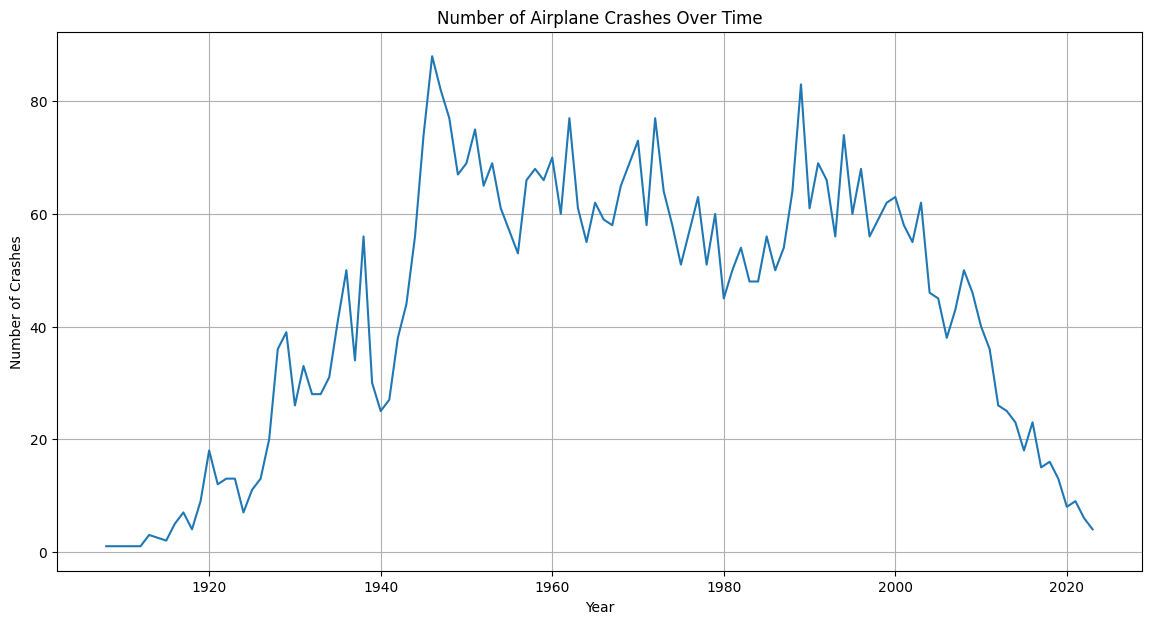

In [11]:
# Time series plot of crashes over years
crashes_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title('Number of Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

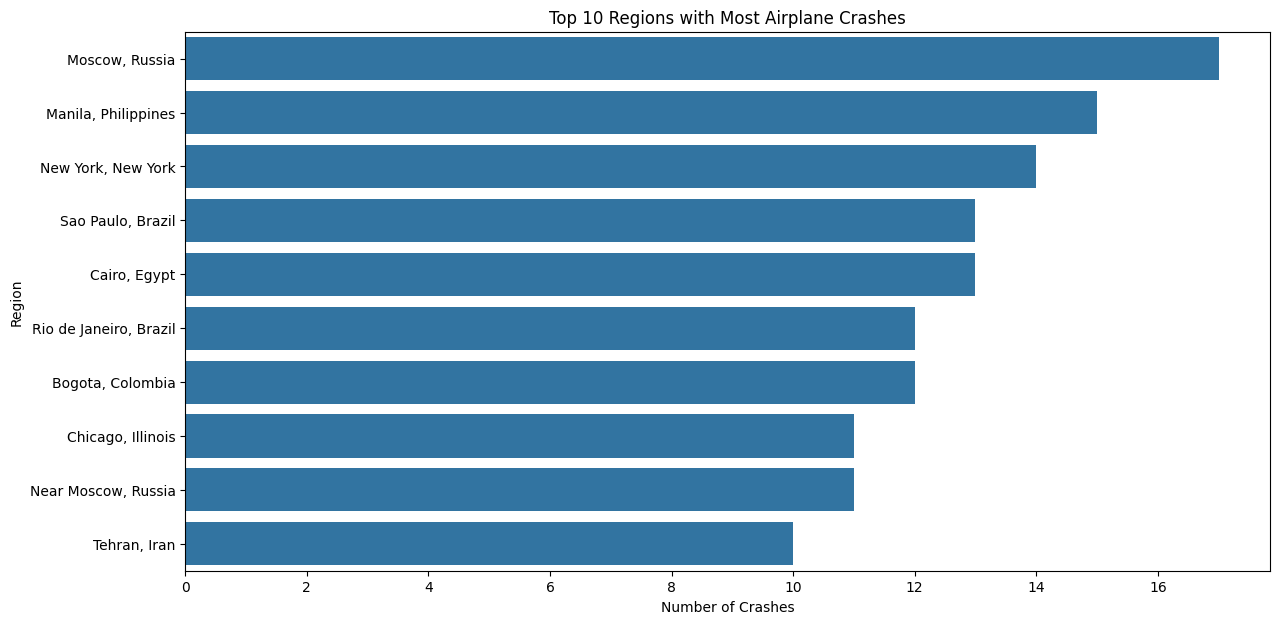

In [12]:
# Bar chart of crashes by region
crashes_by_region = df['Location'].value_counts().nlargest(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=crashes_by_region.values, y=crashes_by_region.index)
plt.title('Top 10 Regions with Most Airplane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Region')
plt.show()

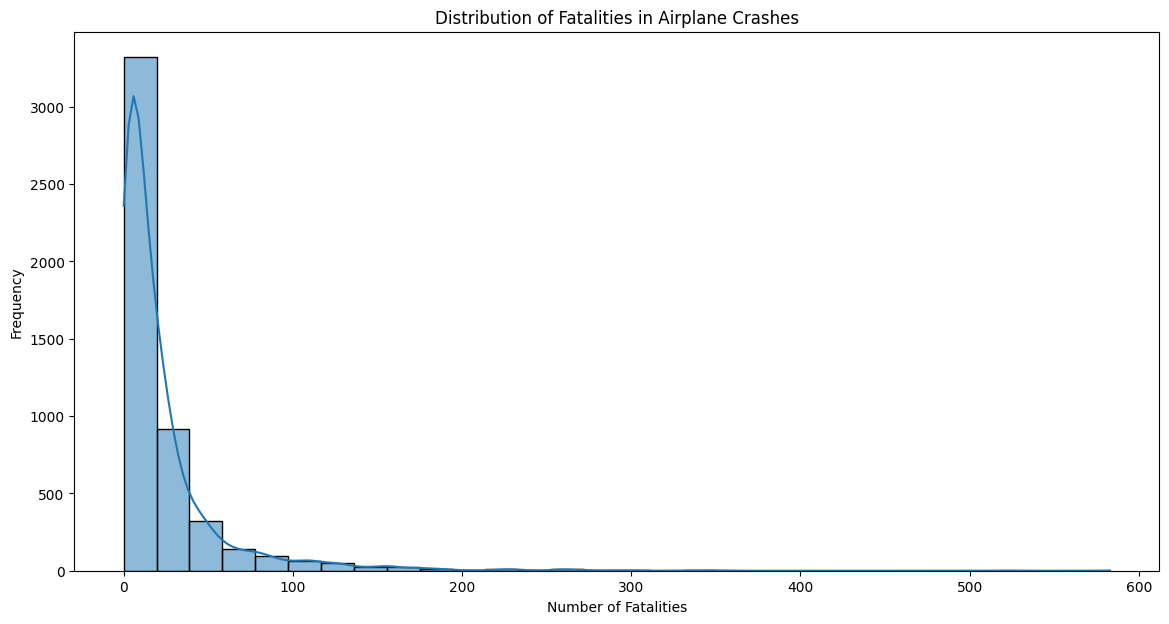

In [13]:
# Histogram of fatalities
plt.figure(figsize=(14, 7))
sns.histplot(df['Fatalities'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fatalities in Airplane Crashes')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

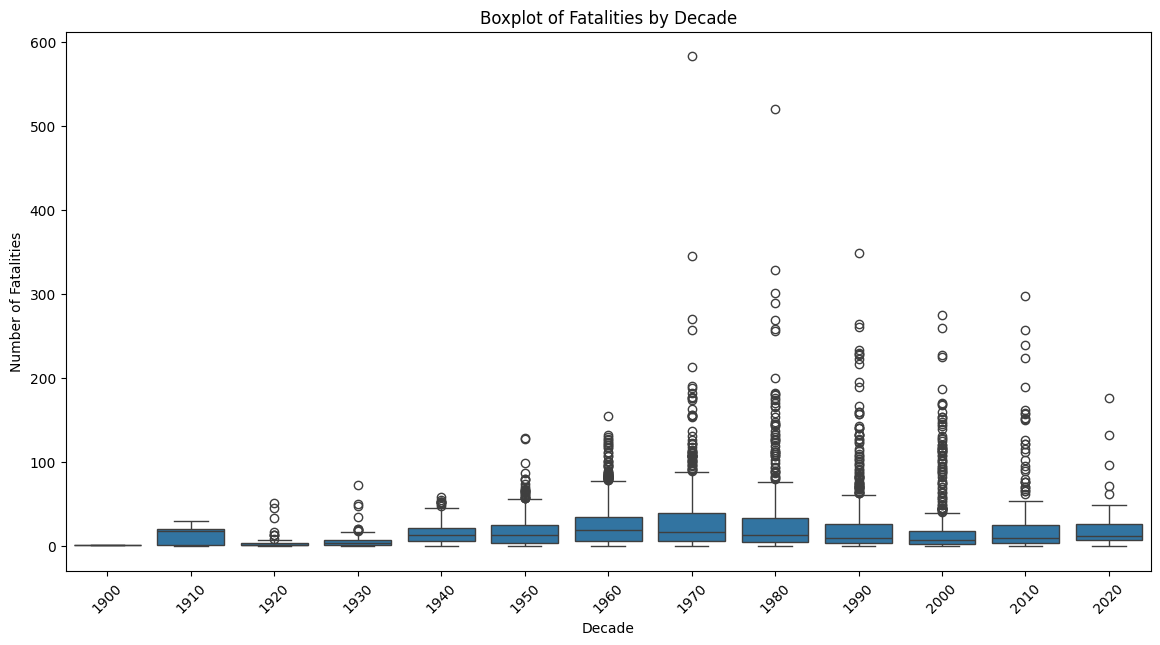

In [14]:
# Boxplot of fatalities by decade
df['Decade'] = (df['Year'] // 10) * 10
plt.figure(figsize=(14, 7))
sns.boxplot(x='Decade', y='Fatalities', data=df)
plt.title('Boxplot of Fatalities by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()

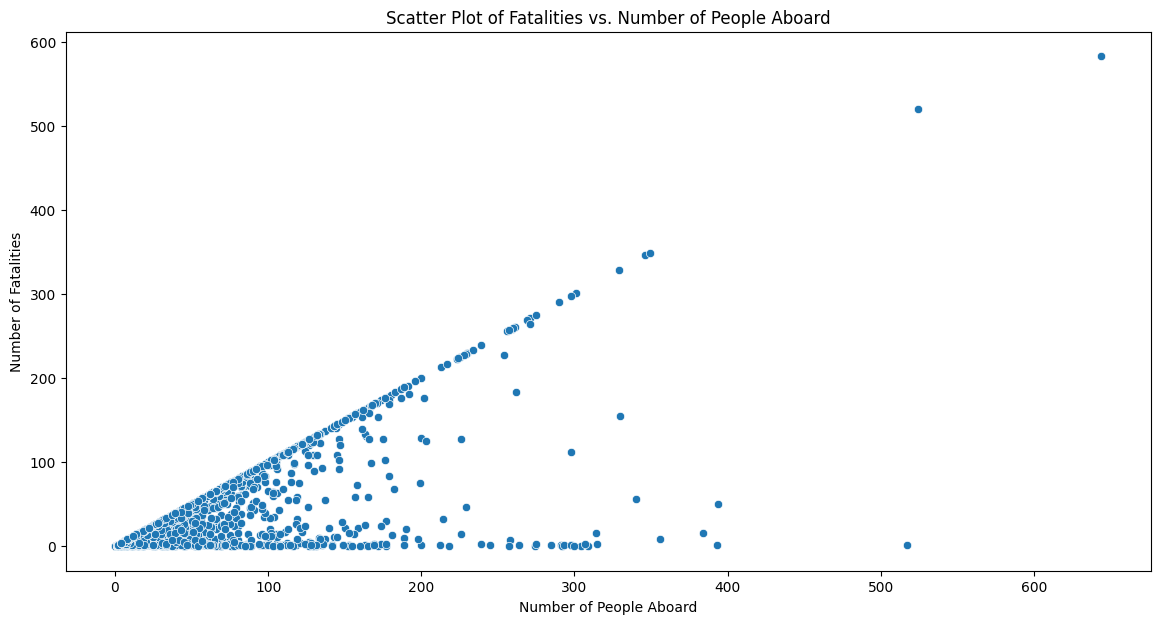

In [15]:
# Scatter plot of fatalities vs. number of people aboard
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Aboard', y='Fatalities', data=df)
plt.title('Scatter Plot of Fatalities vs. Number of People Aboard')
plt.xlabel('Number of People Aboard')
plt.ylabel('Number of Fatalities')
plt.show()

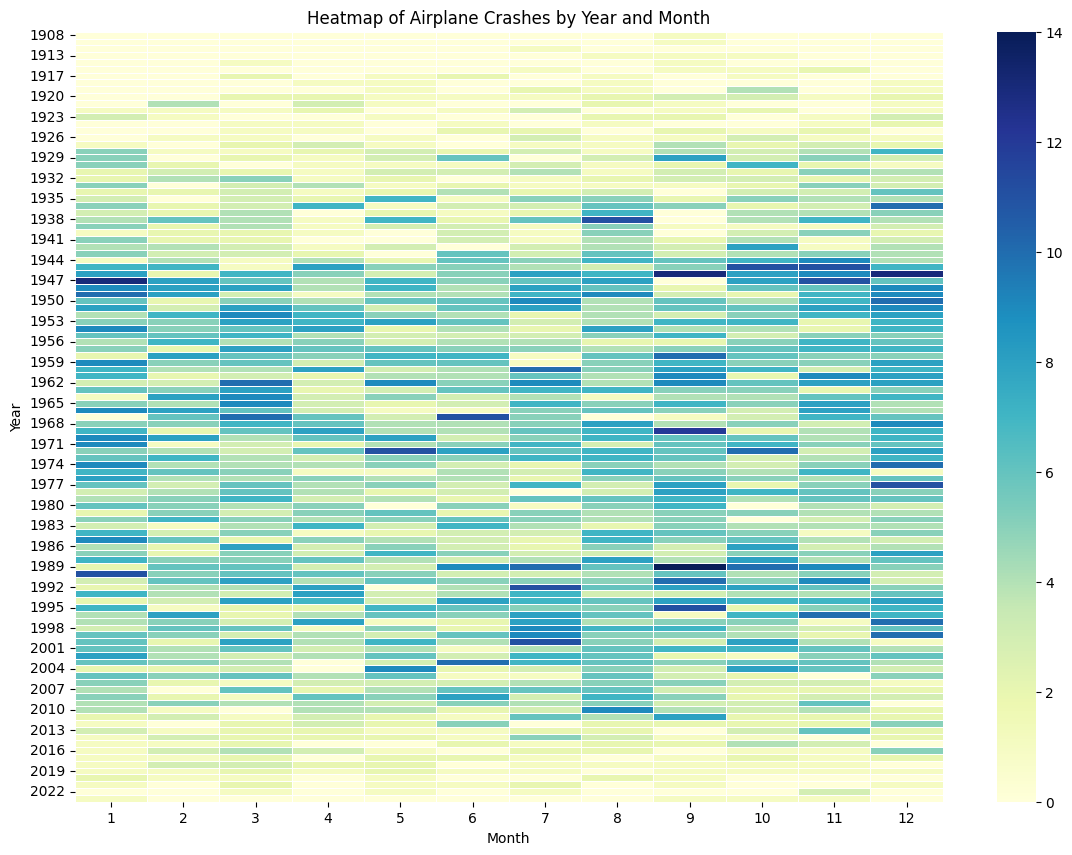

In [16]:
# Pivot table for heatmap
df['Month'] = df['Date'].dt.month
crashes_by_year_month = df.pivot_table(index='Year', columns='Month', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(crashes_by_year_month, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Airplane Crashes by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()